In [19]:
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
import numpy as np

pi = np.pi
G = 6.67430e-11

mErde = 5.9721986*10**24        # kg          : Masse der Erde
mOzean = 0.0014*10**24          # kg          : Masse der Ozeane auf der Erde

mMond = 7.3459*10**22           # kg          : Masse des Mondes 
rMondBahn = 3.836*10**8         # m           : Bahnradius des Mondes, die Umlaufbahn des Mondes
                                #               um die Erde kann als Kreisbahn genähert werden
TMondBahn = 27.32166140*24*3600 # s           : Heutige Periodendauer der Mondumlaufbahn um die Erde

RErde = 6.3675*10**6            # kg          : Radius der Erde

In [20]:
def flutberg_diff(x_E, y_E, vx_Ed, vy_Ed, x_M, y_M, phi_i, alpha_i, m_M):
    vx_id = -G*(m_M*((y_M - (y_E + RErde*np.sin(phi_i)))*np.cos(phi_i) - (x_M - (x_E + RErde*np.cos(phi_i)))*np.sin(phi_i))) / ((x_M - (x_E + RErde*np.cos(phi_i)))**2 + (y_M - (y_E + RErde*np.sin(phi_i)))**2)**(3/2) * np.sin(phi_i) -(RErde*alpha_i**2 - (vx_Ed*np.cos(phi_i) + vy_Ed*np.sin(phi_i)))*np.cos(phi_i)
    vy_id = G*(m_M*((y_M - (y_E + RErde*np.sin(phi_i)))*np.cos(phi_i) - (x_M - (x_E + RErde*np.cos(phi_i)))*np.sin(phi_i))) / ((x_M - (x_E + RErde*np.cos(phi_i)))**2 + (y_M - (y_E + RErde*np.sin(phi_i)))**2)**(3/2) * np.cos(phi_i) -(RErde*alpha_i**2 - (vx_Ed*np.cos(phi_i) + vy_Ed*np.sin(phi_i)))*np.sin(phi_i)
    alpha_id = (-(vx_id - vx_Ed)*np.sin(phi_i) + (vy_id - vy_Ed)*np.cos(phi_i))/RErde

    return alpha_id

In [21]:
def diff_eq(t, state, m_E, m_M, m_1, m_2):
    x_E, y_E, x_M, y_M, phi_1, phi_2, vx_E, vy_E, vx_M, vy_M, alpha_1, alpha_2 = state #unpack the state
    #calculating the earhts acceleration:
    #first some useful variables
    mu_x = m_E + m_1*np.cos(phi_1)**2 + m_2*np.cos(phi_2)**2
    mu_y = m_E + m_1*np.sin(phi_1)**2 + m_2*np.sin(phi_2)**2
    a = (G*m_M*m_E)/((x_M - x_E)**2 + (y_M - y_E)**2)**(3/2)
    b = m_1*np.sin(phi_1)*np.cos(phi_1) + m_2*np.sin(phi_2)*np.cos(phi_2)
    c1 = m_1*RErde*alpha_1**2 + (G*m_M*m_1*((x_M - (x_E + RErde*np.cos(phi_1)))*np.cos(phi_1) + (y_M - (y_E + RErde*np.sin(phi_1)))))/((x_M - (x_E + RErde*np.cos(phi_1)))**2 + (y_M - (y_E + RErde*np.sin(phi_1)))**2)**(3/2)
    c2 = m_2*RErde*alpha_2**2 + (G*m_M*m_2*((x_M - (x_E + RErde*np.cos(phi_2)))*np.cos(phi_2) + (y_M - (y_E + RErde*np.sin(phi_2)))))/((x_M - (x_E + RErde*np.cos(phi_2)))**2 + (y_M - (y_E + RErde*np.sin(phi_2)))**2)**(3/2)

    vx_Ed = 1/(mu_x - b**2/mu_y) * (a*(x_M - x_E) -b/mu_y*(a*(y_M - y_E) + c1*np.sin(phi_1) + c2*np.sin(phi_2)) + c1*np.cos(phi_1) + c2*np.cos(phi_2))
    vy_Ed = 1/mu_y*(a*(y_M - y_E) - b*vx_Ed + c1*np.sin(phi_1) + c2*np.sin(phi_2))

    #calculating the moons acceleration:
    vx_Md = G*((m_E*(x_E - x_M))/((x_E - x_M)**2 + (y_E - y_M)**2)**(3/2) + (m_1*(x_E + RErde*np.cos(phi_1) - x_M))/((x_E + RErde*np.cos(phi_1) - x_M)**2 + (y_E + RErde*np.sin(phi_1) - y_M)**2)**(3/2) + (m_2*(x_E + RErde*np.cos(phi_2) - x_M))/((x_E + RErde*np.cos(phi_2) - x_M)**2 + (y_E + RErde*np.sin(phi_2) - y_M)**2)**(3/2))
    vy_Md = G*((m_E*(y_E - y_M))/((x_E - x_M)**2 + (y_E - y_M)**2)**(3/2) + (m_1*(y_E + RErde*np.cos(phi_1) - y_M))/((x_E + RErde*np.cos(phi_1) - x_M)**2 + (y_E + RErde*np.sin(phi_1) - y_M)**2)**(3/2) + (m_2*(y_E + RErde*np.cos(phi_2) - y_M))/((x_E + RErde*np.cos(phi_2) - x_M)**2 + (y_E + RErde*np.sin(phi_2) - y_M)**2)**(3/2))

    #tides angular acceleration:
    alpha_1d = flutberg_diff(x_E, y_E, vx_Ed, vy_Ed, x_M, y_M, phi_1, alpha_1, m_M)
    alpha_2d = flutberg_diff(x_E, y_E, vx_Ed, vy_Ed, x_M, y_M, phi_2, alpha_2, m_M)

    return[vx_E, vy_E, vx_M, vy_M, alpha_1, alpha_2, vx_Ed, vy_Ed, vx_Md, vy_Md, alpha_1d, alpha_2d]

In [22]:
#Initial Values



# Calculate the barycenter of two bodies (The point around which both bodies orbit)
def baryzentrum(m1, m2, r):
    ''' Returns the distance of the barycenter from the body with mass m1 '''
    return r*m2/(m1+m2)

abstand_baryzentrum_erde = baryzentrum(mErde, mMond, rMondBahn)
vErde = 2*pi*abstand_baryzentrum_erde/TMondBahn
vMond = 2*pi*(rMondBahn-abstand_baryzentrum_erde)/TMondBahn

def iv_stable_orbit():
    # Initial conditions for the Earth-Moon system in a stable orbit
    mass = [mErde, mMond]
    # We want the center of mass to be at the origin
    x = [-abstand_baryzentrum_erde, rMondBahn-abstand_baryzentrum_erde]
    y = [0, 0]
    v_x = [0, 0]
    v_y = [-vErde, vMond] # The moon starts in positive, the earth in negative y-direction
    return [mass, x, y, v_x, v_y]

print(iv_stable_orbit())

[[5.9721986e+24, 7.3459e+22], [-4661010.309283808, 378938989.6907162], [0, 0], [0, 0], [-12.406208754933438, 1008.6217149365116]]


In [23]:
sol = solve_ivp(fun=diff_eq, t_span=[0,5*TMondBahn], y0=(-4661010.309283808, 0, 378938989.6907162, 0, 0, pi, 0, -12.406208754933438, 0, 1008.6217149365116, 2*pi/TMondBahn, 2*pi/TMondBahn), args=(mErde, mMond, mOzean/2, mOzean/2), rtol=1e-12, atol=1e-12)

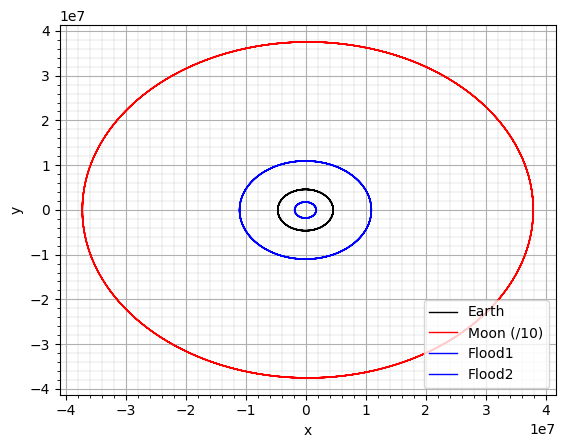

In [24]:
plt.close()

plt.rc('axes', axisbelow=True)
plt.grid('minor', 'minor', linestyle='-', linewidth=0.2)
plt.grid('major', 'major', linestyle='-', linewidth=0.8)
plt.minorticks_on()
plt.xlabel("x")
plt.ylabel("y")

plt.plot(sol.y[0], sol.y[1], 'k', linewidth=1, label='Earth')
plt.plot(sol.y[2]/10, sol.y[3]/10, 'r', linewidth=1, label='Moon (/10)')
plt.plot(sol.y[0] + RErde*np.cos(sol.y[4]), sol.y[1] + RErde*np.sin(sol.y[4]), 'b', linewidth=1, label='Flood1')
plt.plot(sol.y[0] + RErde*np.cos(sol.y[5]), sol.y[1] + RErde*np.sin(sol.y[5]), 'b', linewidth=1, label='Flood2')

plt.legend()

plt.show()

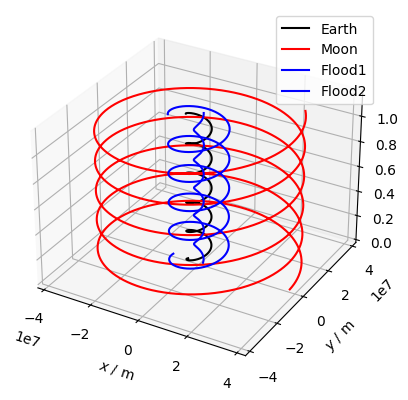

In [25]:
# Plot a 3d phase space diagram
fig = plt.figure()

ax = fig.add_subplot(111, projection='3d')
ax.plot(sol.y[0], sol.y[1], sol.t, 'k', label='Earth')
ax.plot(sol.y[2]/10, sol.y[3]/10, sol.t, 'r', label='Moon')
ax.plot(sol.y[0] + RErde*np.cos(sol.y[4]), sol.y[1] + RErde*np.sin(sol.y[4]), sol.t, 'b', label='Flood1')
ax.plot(sol.y[0] + RErde*np.cos(sol.y[5]), sol.y[1] + RErde*np.sin(sol.y[5]), sol.t, 'b', label='Flood2')
ax.set_xlabel("$x$ / m")
ax.set_ylabel("$y$ / m")
ax.set_zlabel("$t$ / s")
ax.legend()
plt.show()
plt.close()

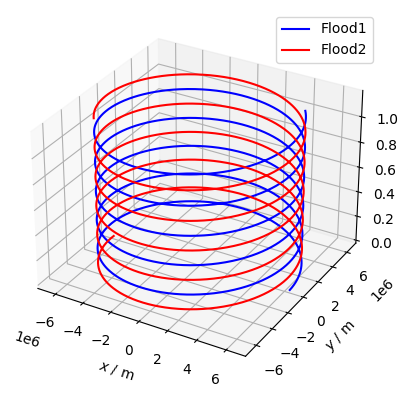

In [26]:
# Plot a 3d phase space diagram
fig = plt.figure()

ax = fig.add_subplot(111, projection='3d')
#ax.plot(sol.y[0], sol.y[1], sol.t, 'k', label='Earth')
#ax.plot(sol.y[2], sol.y[3], sol.t, 'r', label='Moon')
ax.plot(0 + RErde*np.cos(sol.y[4]), 0 + RErde*np.sin(sol.y[4]), sol.t, 'b', label='Flood1')
ax.plot(0 + RErde*np.cos(sol.y[5]), 0 + RErde*np.sin(sol.y[5]), sol.t, 'r', label='Flood2')
ax.set_xlabel("$x$ / m")
ax.set_ylabel("$y$ / m")
ax.set_zlabel("$t$ / s")
ax.legend()
plt.show()
plt.close()

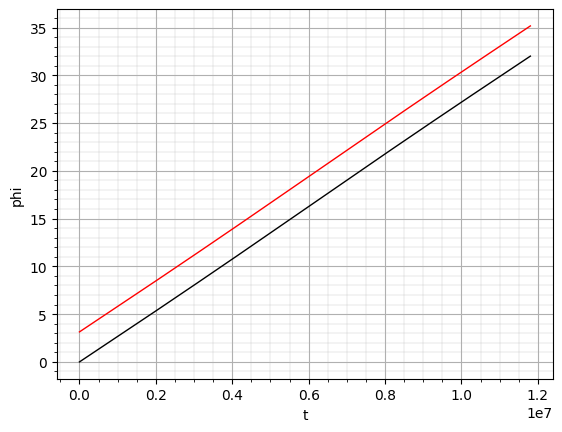

In [27]:
plt.close()

plt.rc('axes', axisbelow=True)
plt.grid('minor', 'minor', linestyle='-', linewidth=0.2)
plt.grid('major', 'major', linestyle='-', linewidth=0.8)
plt.minorticks_on()
plt.xlabel("t")
plt.ylabel("phi")

plt.plot(sol.t, sol.y[4] , 'k', linewidth=1)
plt.plot(sol.t, sol.y[5], 'r', linewidth=1)

plt.show()